In [5]:
import pandas as pd
train = pd.read_csv("train.csv")
print(train.shape)
test = pd.read_csv("test.csv")
print(test.shape)
alldata = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']), ignore_index=True)
print(alldata.shape)

(1460, 81)
(1459, 80)
(2919, 79)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略警告
import warnings
warnings.filterwarnings('ignore')
# 读取训练集和测试集
train = pd.read_csv('train.csv')
train_len = len(train)
test = pd.read_csv('test.csv')

In [7]:
# 查看训练集
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# 查看测试集, 缺少最后一列SalePrice
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# 合并训练集和测试集,去掉房价一列
all_data = pd.concat([train, test], axis = 0, ignore_index= True)
all_data.drop(labels = ["SalePrice"],axis = 1, inplace = True)
#inplace=True的意思是进行原地操作

In [18]:
#读取数据
train = pd.read_csv('E:\Competition\Kaggle_house_prices/origina_data/train.csv')
test = pd.read_csv('E:\Competition\Kaggle_house_prices/origina_data/test.csv')

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x:'{:.2f}'.format(x))#设置显示到小数点后2位

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.preprocessing import LabelEncoder

In [2]:
train = pd.read_csv('train.csv')
print('The shape of training data:', train.shape)
train.head()

The shape of training data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv('test.csv')
print('The shape of testing data:', test.shape)
test.head()

The shape of testing data: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
#ID无用，直接删去
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
print('The shape of training data:', train.shape)
print('The shape of testing data:', test.shape)

The shape of training data: (1460, 80)
The shape of testing data: (1459, 79)


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


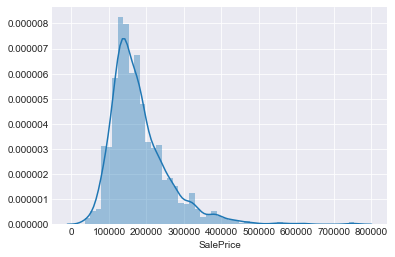

In [5]:
#目标分布，
sns.distplot(train['SalePrice'])

In [6]:
#这就意味着我们之后要对目标值做一些处理，因为回归模型在正态分布的数据集上
train['SalePrice'].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

In [7]:
#分离数字特征和类别特征
num_features = []
cate_features = []
for col in test.columns:
    if test[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('number of numeric feature:', len(num_features))
print('number of categorical features:', len(cate_features))

number of numeric feature: 36
number of categorical features: 43


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


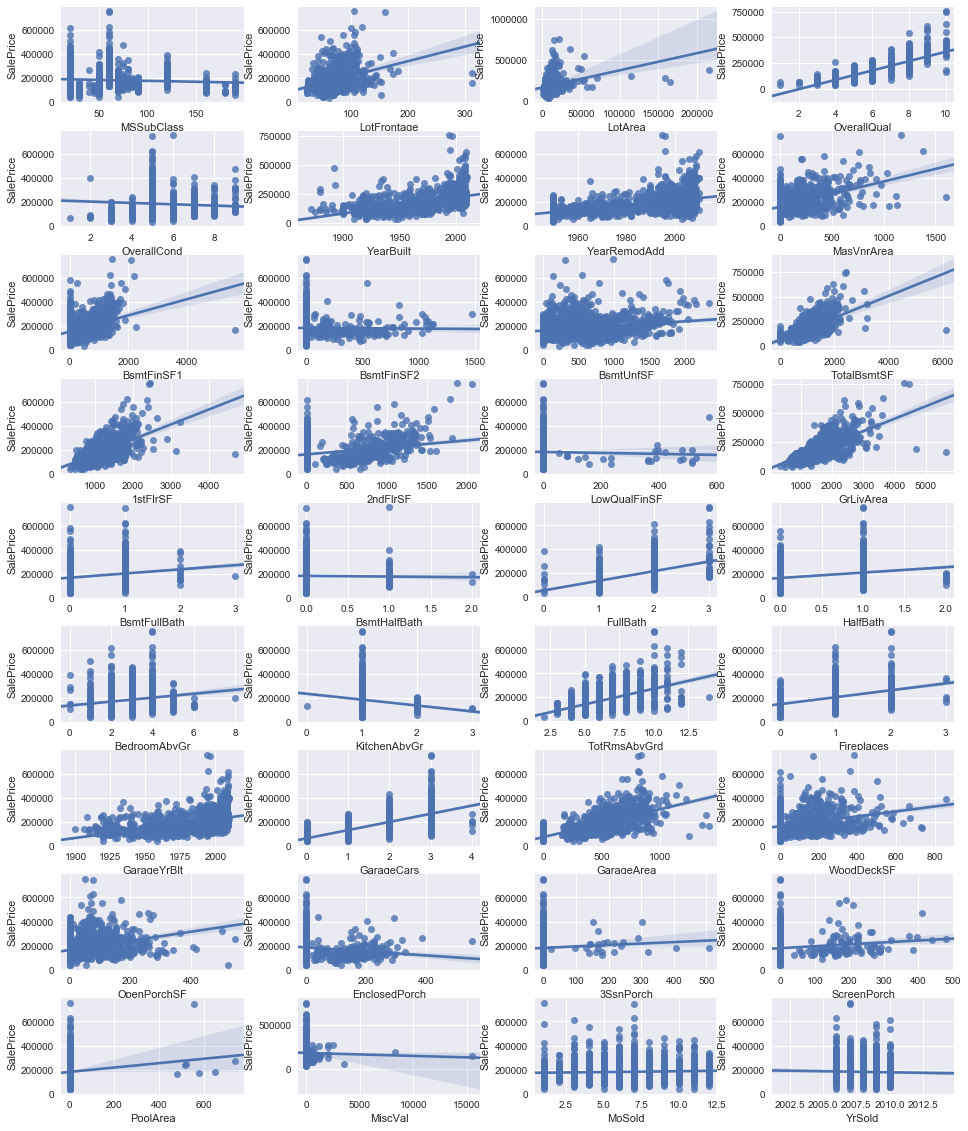

In [15]:
#查看数字特征与目标值的关系
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(num_features):
    plt.subplot(9, 4, i+1)
    sns.set()
    sns.regplot(x=feature, y='SalePrice', data=train)
#     sns.scatterplot(x=feature, y='SalePrice', data=train, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

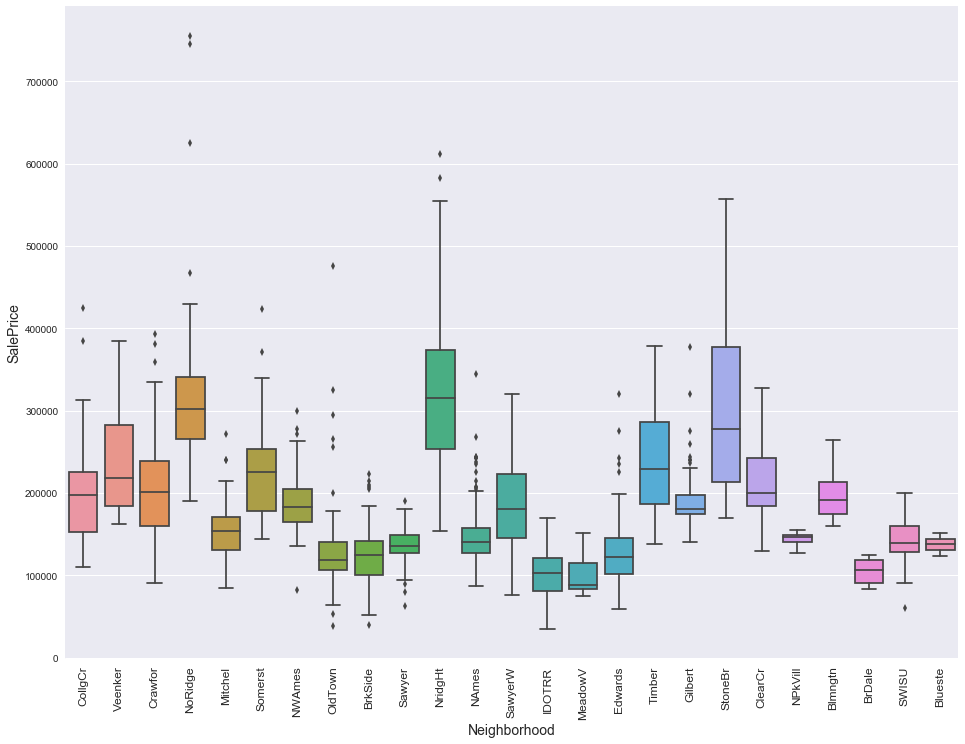

In [18]:
#查看Neighborhood与目标值的关系
plt.figure(figsize=(16,12))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.xticks(rotation=90,fontsize=12)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

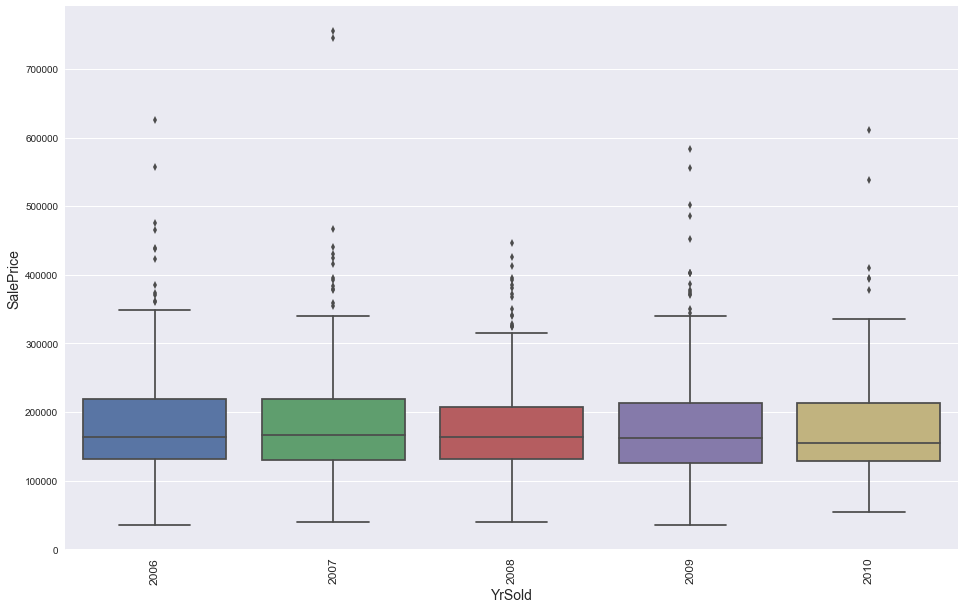

In [19]:
plt.figure(figsize=(16,10))
sns.boxplot(x='YrSold', y='SalePrice', data=train)
plt.xlabel('YrSold', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)
plt.xticks(rotation=90,fontsize=12)#plt.xticks（) 表达的是x轴的刻度内容的范围

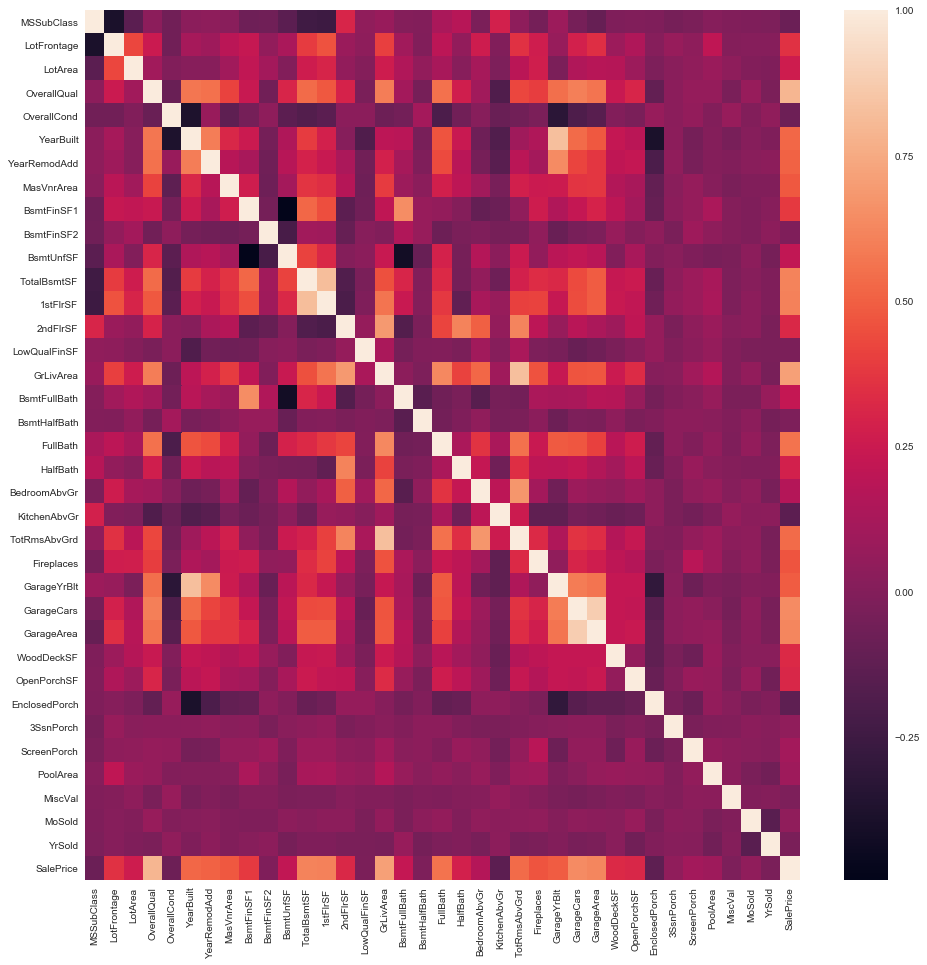

In [20]:
corrs = train.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corrs)

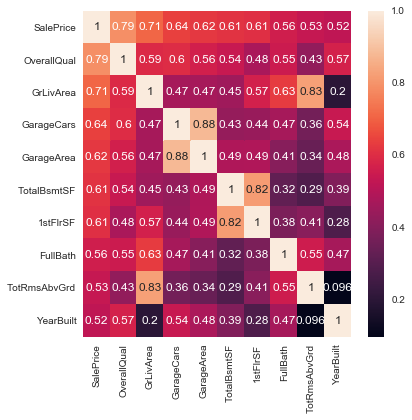

In [21]:
#分析与目标值相关度最高的是个特征
cols_10 = corrs.nlargest(10,'SalePrice')['SalePrice'].index
corrs_10 = train[cols_10].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrs_10, annot=True)

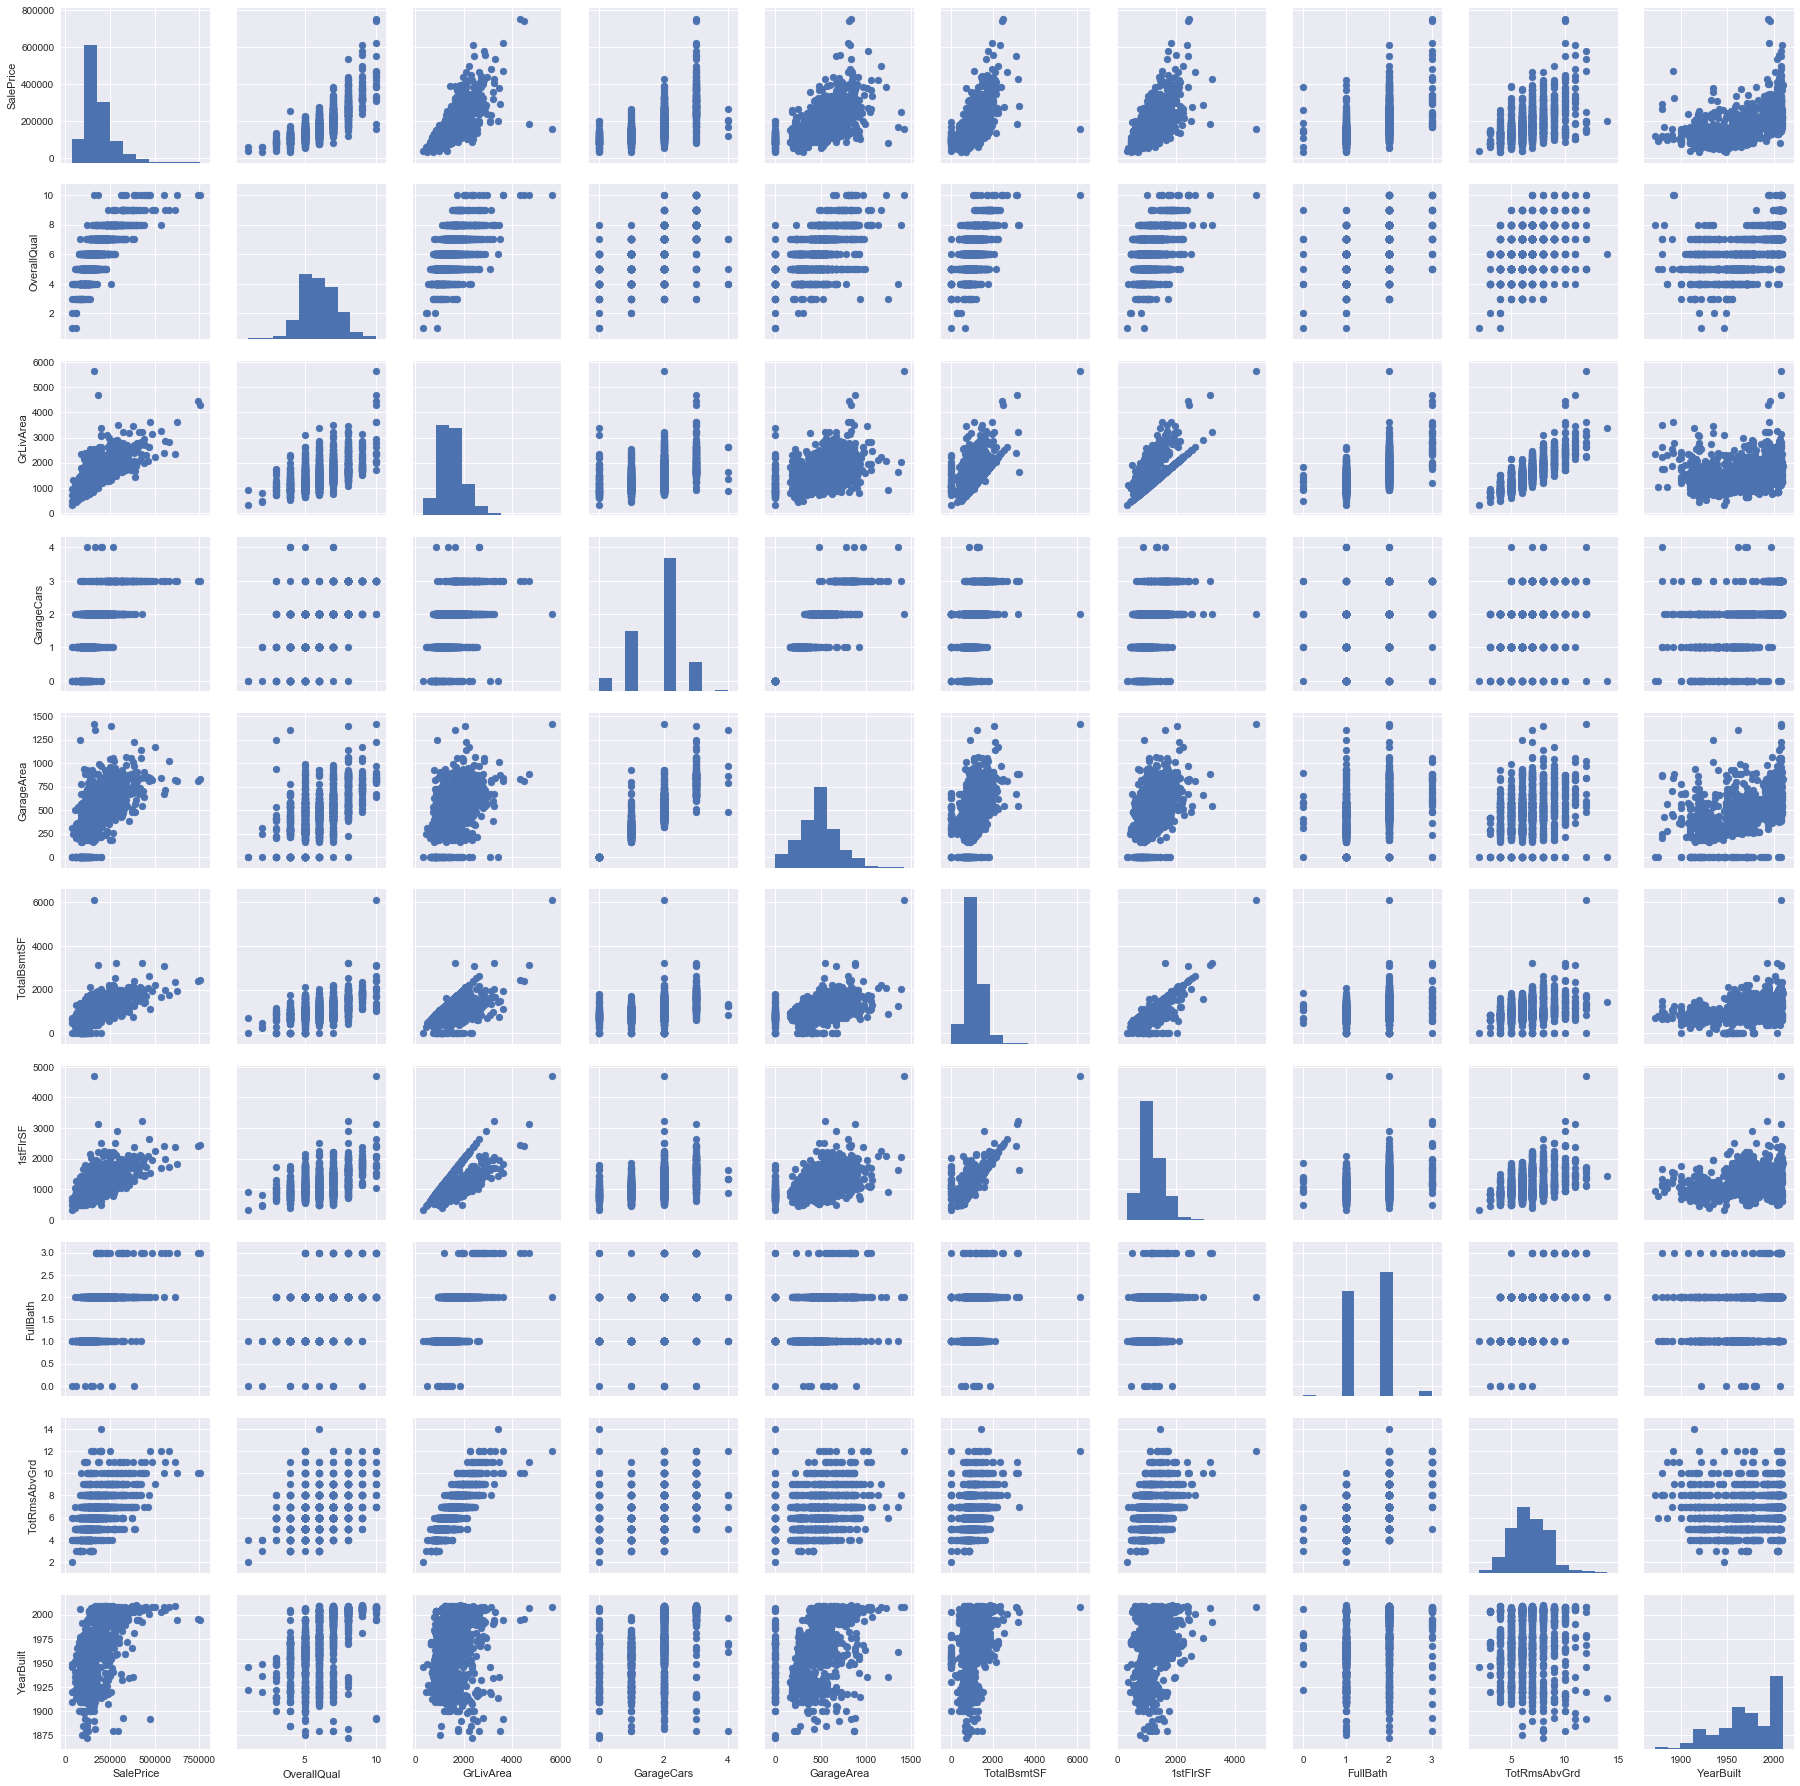

In [25]:
#绘制这十个特征两两之间的散点图
#sns.pairplot(df)：绘制出各变量之间的散点图与条形图，且对角线均为条形图。
g = sns.PairGrid(train[cols_10])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# 异常值处理

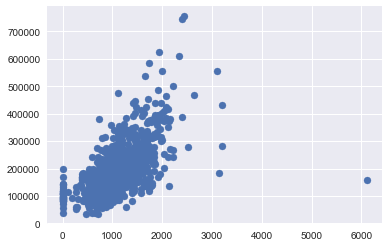

In [28]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train)

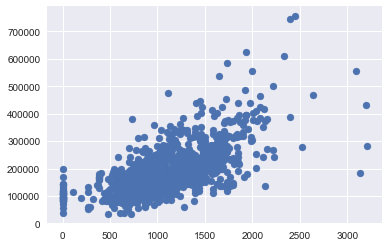

In [30]:
#去掉右下角的异常值
train = train.drop(train[(train['TotalBsmtSF']>6000) & (train['SalePrice']<200000)].index)
plt.scatter(x='TotalBsmtSF', y='SalePrice',data=train)

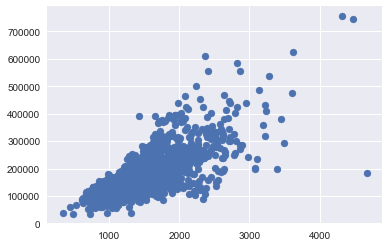

In [31]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train)

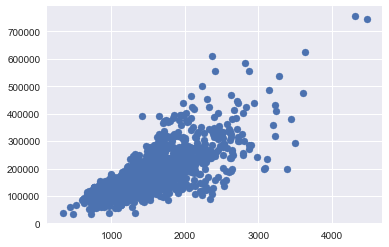

In [32]:
#去掉右下角的异常值
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<200000)].index)
plt.scatter(x='GrLivArea', y='SalePrice',data=train)

# 缺失值处理
注意不能把训练数据和测试数据连接在一起处理，会造成数据泄露，应该分步处理，先处理训练数据，再同样地处理测试数据。

In [33]:
#查看训练集中各特征的数据缺失个数
print('The shape of training data:', train.shape)
train_missing = train.isnull().sum()
train_missing = train_missing.drop(train_missing[train_missing==0].index).sort_values(ascending=False)
train_missing

The shape of training data: (1458, 80)


PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [37]:
#查看测试集中各特征的数据缺失个数
print('The shape of testing data:', test.shape)
test_missing = test.isnull().sum()
test_missing = test_missing.drop(test_missing[test_missing==0].index).sort_values(ascending=False)
test_missing

The shape of testing data: (1459, 79)


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

# 类别特征处理

In [38]:
none_lists = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType1',
              'BsmtFinType2', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 'MasVnrType']
for col in none_lists:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')

In [39]:
most_lists = ['MSZoning', 'Exterior1st', 'Exterior2nd', 'SaleType', 'KitchenQual', 'Electrical']
for col in most_lists:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(train[col].mode()[0])

In [40]:
train['Functional'] = train['Functional'].fillna('Typ')
test['Functional'] = test['Functional'].fillna('Typ')

In [41]:
train.drop('Utilities', axis = 1, inplace = True)
test.drop('Utilities', axis = 1, inplace = True)

# 数字特征处理

In [42]:
zero_lists = ['GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'GarageCars', 'GarageArea',
              'TotalBsmtSF']
for col in zero_lists:
    train[col] = train[col].fillna(0)
    test[col] = test[col].fillna(0)

In [48]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].apply(lambda x: x.fillna(x.median()))
for ind in test['LotFrontage'][test['LotFrontage'].isnull().values==True].index:
    x = test['Neighborhood'].iloc[ind]
    test['LotFrontage'].iloc[ind] = train.groupby('Neighborhood')['LotFrontage'].median()[x]

In [49]:
train.isnull().sum().any()

False

In [50]:
test.isnull().sum().any()

False

In [51]:
#从存放类别特征的列表去掉'Utilities'
cate_features.remove('Utilities')
print('The number of categorical features:', len(cate_features))

The number of categorical features: 42


# 转换类别特征
类别特征不能直接输入模型，因此要对其进行编码，把它转换成数字。编码有两种方式，对于各个类别中可能存在顺序关系的，用LabelEncoder编码，
对于不存在顺序关系的，用get_dummies。

In [58]:
from sklearn import preprocessing
for col in cate_features:
    train[col]=train[col].astype(str)
    test[col]=test[col].astype(str)
le_features = ['Street', 'Alley', 'LotShape', 'LandContour', 'LandSlope', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir',
               'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']
for col in le_features:
    encoder = preprocessing.LabelEncoder()
    value_train = set(train[col].unique())#查找数组的唯一(unique)元素。
    value_test = set(test[col].unique())#查找数组的唯一(unique)元素。
    value_list = list(value_train | value_test)
    encoder.fit(value_list)
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])

In [63]:
# 先获得偏斜度大于0.5的特征
# 偏度是统计数据分布偏斜方向和程度的度量，是统计数据分布非对称程度的数字特征。
skewness = train[num_features].apply(lambda x : skew(x)).sort_values(ascending = False)
# print(num_features)
skewness = skewness[skewness>0.5]
skew_features = skewness.index
skewness

MiscVal         24.43
PoolArea        15.93
LotArea         12.56
3SsnPorch       10.29
LowQualFinSF     9.00
KitchenAbvGr     4.48
BsmtFinSF2       4.25
ScreenPorch      4.11
BsmtHalfBath     4.10
EnclosedPorch    3.08
MasVnrArea       2.69
OpenPorchSF      2.34
LotFrontage      1.55
WoodDeckSF       1.54
MSSubClass       1.41
GrLivArea        1.01
BsmtUnfSF        0.92
1stFlrSF         0.89
2ndFlrSF         0.81
BsmtFinSF1       0.76
OverallCond      0.69
HalfBath         0.68
TotRmsAbvGrd     0.66
Fireplaces       0.63
BsmtFullBath     0.59
TotalBsmtSF      0.51
dtype: float64

In [64]:
# 由于数据中可能存在许多没有处理的异常值，为了增强模型对异常值的刚度，我们采用Box Cox转换来处理偏斜数据：
for col in skew_features:
    lam = stats.boxcox_normmax(train[col] + 1)#+1是为了保证输入大于零
    train[col] = boxcox1p(train[col], lam)
    test[col] = boxcox1p(test[col], lam)

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


# 构建新的特征

In [65]:
train['IsRemod'] = 1
train['IsRemod'].loc[train['YearBuilt']==train['YearRemodAdd']] = 0 #是否翻新(翻新：1， 未翻新：0)
train['BltRemodDiff'] = train['YearRemodAdd'] - train['YearBuilt'] #翻新与建造的时间差（年）
train['BsmtUnfRatio'] = 0
train['BsmtUnfRatio'].loc[train['TotalBsmtSF']!=0] = train['BsmtUnfSF'] / train['TotalBsmtSF']  #Basement未完成占总面积的比例
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']  #总面积
#对测试集做同样的处理
test['IsRemod'] = 1 
test['IsRemod'].loc[test['YearBuilt']==test['YearRemodAdd']] = 0  #是否翻新(翻新：1， 未翻新：0)
test['BltRemodDiff'] = test['YearRemodAdd'] - test['YearBuilt']  #翻新与建造的时间差（年）
test['BsmtUnfRatio'] = 0
test['BsmtUnfRatio'].loc[test['TotalBsmtSF']!=0] = test['BsmtUnfSF'] / test['TotalBsmtSF']  #Basement未完成占总面积的比例
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']  #总面积

In [66]:
# 处理其余的类别特征
dummy_features = list(set(cate_features).difference(set(le_features)))
dummy_features

['GarageType',
 'Condition1',
 'RoofStyle',
 'MiscFeature',
 'SaleType',
 'MSZoning',
 'SaleCondition',
 'Electrical',
 'MasVnrType',
 'Neighborhood',
 'LotConfig',
 'Condition2',
 'Heating',
 'BldgType']

In [67]:
# 把训练数据和测试数据连接起来一起处理（因为独热编码不会产生数据泄露，所以可以放在一起处理）：
all_data = pd.concat((train.drop('SalePrice', axis = 1), test)).reset_index(drop=True)
all_data = pd.get_dummies(all_data, drop_first=True) #注意独热编码生成的时候要去掉一个维度，保证剩下的变量都是相互独立的

# 保存处理后的训练数据和测试数据

In [68]:
trainset = all_data[:1458]
y = train['SalePrice']
trainset['SalePrice'] = y.values
testset = all_data[1458:]
print('The shape of training data:', trainset.shape)
print('The shape of testing data:', testset.shape)

The shape of training data: (1458, 160)
The shape of testing data: (1459, 159)


In [69]:
trainset.to_csv('train_data.csv', index = False)
testset.to_csv('test_data.csv', index = False)